In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

이제 3가지 유형으로 빈 자리를 채우고  
1. 계단형
2. 직선형
3. spline
성능을 계산해보자

In [8]:
df = pd.read_csv('krxhynix.csv')

In [9]:
df.head()

,Unnamed: 0,date,KRX_close,KRX_vol,KRX_change,hynix_close,hynix_vol,hynix_change
0,0,2006-01-02,"1,000.00","19,901,799",NaN,"37,600","13,366,196",6.52
1,1,2006-01-03,"1,012.36","23,519,159",NaN,"38,100","13,834,043",1.33
2,2,2006-01-04,"1,007.17","35,951,797",NaN,"35,300","23,140,068",-7.35
3,3,2006-01-05,991.68,"32,261,363",NaN,"34,600","21,566,179",-1.98
4,4,2006-01-06,"1,008.15","21,152,418",NaN,"35,050","12,707,206",1.30


In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
krx = df[['date', 'KRX_change']]

In [337]:
krx.head()

,date,KRX_change
0,2006-01-02,NaN
1,2006-01-03,NaN
2,2006-01-04,NaN
3,2006-01-05,NaN
4,2006-01-06,NaN


In [226]:
# 일단 2가지로 a
step = pd.read_csv('bloomberg_total_index3.csv')

In [228]:
step.head()

,date,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,1981.1.1,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981.1.2,18.0,14.65,12.422,95.6833,410.0,3123.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981.1.5,18.0,13.52,12.152,94.4815,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981.1.6,18.0,13.58,12.112,94.3829,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981.1.7,18.0,14.50,12.382,94.7921,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
a = step.max()

In [239]:
a = pd.DataFrame(a)

In [259]:
a[0].sort_values(ascending = False)[0:6]

INJCSPIndex         6635
KODIBALIndex      6089.8
LEISTKPIndex     2996.11
USEMNCHGIndex       2036
NFPTCHIndex         1118
NFPPCHIndex         1092
Name: 0, dtype: object

In [260]:
evil = a[0].sort_values(ascending = False)[0:6]

In [261]:
evil

INJCSPIndex         6635
KODIBALIndex      6089.8
LEISTKPIndex     2996.11
USEMNCHGIndex       2036
NFPTCHIndex         1118
NFPPCHIndex         1092
Name: 0, dtype: object

In [268]:
a= df[['INJCSPIndex', 'KODIBALIndex', 'LEISTKPIndex', 'USEMNCHGIndex', 'NFPTCHIndex', 'NFPPCHIndex']]

In [290]:
b['KODIBALIndex'][27:60]

27         NaN
28         NaN
29         NaN
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57   -5.614907
58    0.000000
59    0.000000
Name: KODIBALIndex, dtype: float64

In [322]:
b.replace(0, np.nan, inplace = True)

In [320]:
b

,INJCSPIndex,KODIBALIndex,LEISTKPIndex,USEMNCHGIndex,NFPTCHIndex,NFPPCHIndex
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5046,0.0,0.0,0.0,0.000000,0.000000,0.000000
5047,0.0,0.0,0.0,0.000000,0.000000,0.000000
5048,0.0,0.0,0.0,0.000000,0.000000,0.000000
5049,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [311]:
(a['NFPPCHIndex'] == 0).sum()

0

In [288]:
b = a.pct_change(axis = 0)

In [283]:
a['KODIBALIndex'][27:60]

27      NaN
28      NaN
29     96.6
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57   -445.8
58      NaN
59      NaN
Name: KODIBALIndex, dtype: float64

In [323]:
df[['INJCSPIndex', 'KODIBALIndex', 'LEISTKPIndex', 'USEMNCHGIndex', 'NFPTCHIndex', 'NFPPCHIndex']] = b

In [324]:
df.head()

,date,KRX_change,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,2006-01-02,NaN,NaN,4.0736,4.3911,86.0274,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-03,NaN,4.25,4.1144,4.3637,85.0983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-04,NaN,4.25,4.1798,4.3422,84.5642,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-05,NaN,4.25,4.1793,4.3519,84.7247,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-06,NaN,4.25,4.1985,4.3733,84.3844,326.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
a.pct_change(axis = 0)['KODIBALIndex'][27:60]

27         NaN
28         NaN
29         NaN
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57   -5.614907
58    0.000000
59    0.000000
Name: KODIBALIndex, dtype: float64

In [325]:
df[['INJCSPIndex', 'KODIBALIndex', 'LEISTKPIndex', 'USEMNCHGIndex', 'NFPTCHIndex', 'NFPPCHIndex']]

,INJCSPIndex,KODIBALIndex,LEISTKPIndex,USEMNCHGIndex,NFPTCHIndex,NFPPCHIndex
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5046,NaN,NaN,NaN,NaN,NaN,NaN
5047,NaN,NaN,NaN,NaN,NaN,NaN
5048,NaN,NaN,NaN,NaN,NaN,NaN
5049,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
df.to_csv('bloomberg_total_index4.csv')

In [330]:
step = pd.read_csv('bloomberg_total_index4.csv')

In [331]:
# 필요 없는 column drop
step.drop('Unnamed: 0', axis = 1, inplace = True)

In [332]:
step['date'] = pd.to_datetime(step['date'])

In [333]:
krx['date'] = pd.to_datetime(krx['date'])
step['date'] = pd.to_datetime(step['date'])

In [334]:
df = pd.merge(krx, step, how = 'left', on = 'date')

In [339]:
df.drop('KRX_change_y', axis = 1, inplace = True)

In [347]:
df.to_csv('bloomberg_for_step_return.csv')

In [348]:
df['KRX_change'] = df['KRX_change'].map(lambda x: '' if str(x) == 'nan' else x)
df['KRX_change'] = df['KRX_change'].map(lambda x: re.sub(",", "", str(x)))
df['KRX_change'] = pd.to_numeric(df['KRX_change'] )

In [349]:
# date 빼고 다 numeric type으로 만들자
for i in range(len(df.columns)):
    col_name = df.columns[i]
    if col_name == 'date':
        pass
    else:
        df[col_name] = pd.to_numeric(df[col_name])

In [350]:
# 결측치 채우기
# step은 ffill > bfill
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

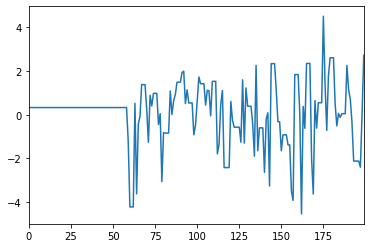

In [351]:
df['KRX_change'][0:200].plot()

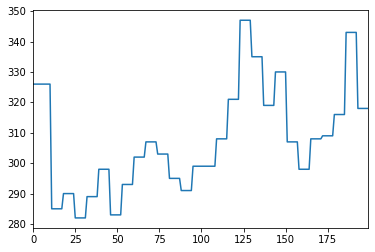

In [352]:
df['INJCJCIndex'].interpolate()[0:200].plot()

In [29]:
#df.to_csv('bloomberg_for_step_return.csv')

In [361]:
step = pd.read_csv('bloomberg_for_step_return.csv')

In [362]:
step.drop('Unnamed: 0', axis = 1, inplace = True)

In [363]:
date = step['date']

In [364]:
step.drop('date', axis = 1, inplace = True)

In [365]:
col_name = step.columns

In [366]:
step.head()

,KRX_change,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,NaN,NaN,4.0736,4.3911,86.0274,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4.25,4.1144,4.3637,85.0983,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.25,4.1798,4.3422,84.5642,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.25,4.1793,4.3519,84.7247,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4.25,4.1985,4.3733,84.3844,326.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [367]:
step.fillna(method = 'ffill', inplace = True)
step.fillna(method = 'bfill', inplace = True)

In [368]:
step = StandardScaler().fit_transform(step)

In [369]:
#step = MinMaxScaler().fit_transform(step)

In [370]:
step = pd.DataFrame(step, columns = col_name)

In [371]:
step.head()

,KRX_change,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,0.161151,1.703184,1.792842,1.545687,0.588382,-0.140455,0.698492,0.082096,0.058887,0.007283,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
1,0.161151,1.703184,1.818005,1.517545,0.470018,-0.140455,0.698492,0.082096,0.058887,0.007283,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
2,0.161151,1.703184,1.858340,1.495463,0.401975,-0.140455,0.698492,0.082096,0.058887,0.007283,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
3,0.161151,1.703184,1.858032,1.505426,0.422422,-0.140455,0.698492,0.082096,0.058887,0.007283,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
4,0.161151,1.703184,1.869873,1.527405,0.379069,-0.140455,0.698492,0.082096,0.058887,0.007283,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213


In [372]:
y_target = step['KRX_change']

In [373]:
X_data = step.drop('KRX_change', axis = 1, inplace = False)

In [374]:
X_data.head()

,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,USMMMNCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,1.703184,1.792842,1.545687,0.588382,-0.140455,0.698492,0.082096,0.058887,0.007283,0.530799,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
1,1.703184,1.818005,1.517545,0.470018,-0.140455,0.698492,0.082096,0.058887,0.007283,0.530799,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
2,1.703184,1.858340,1.495463,0.401975,-0.140455,0.698492,0.082096,0.058887,0.007283,0.530799,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
3,1.703184,1.858032,1.505426,0.422422,-0.140455,0.698492,0.082096,0.058887,0.007283,0.530799,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213
4,1.703184,1.869873,1.527405,0.379069,-0.140455,0.698492,0.082096,0.058887,0.007283,0.530799,...,-2.029483,1.288368,0.786818,-0.182184,-1.77853,-0.05937,-1.983727,0.163325,0.613482,-0.576213


In [150]:
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, shuffle = False)

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [376]:
lr = LinearRegression()

In [377]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [378]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

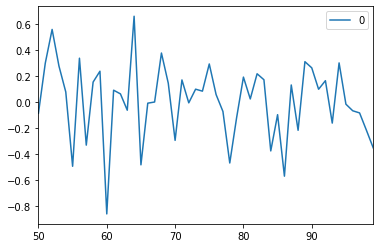

In [379]:
pd.DataFrame(y_pred)[50:100].plot()

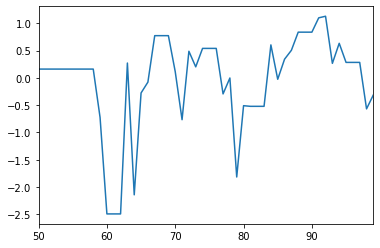

In [380]:
y_target[50:100].plot()

In [381]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  1.044, RMSE : 1.022
Variance Score : -0.019932


In [167]:
# intercept, coefficients 확인
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : 0.015101983654692076
회귀 계수 값 : [-0.4 -0.4  0.   0.6 -0.2 -0.3 -0.6 -0.1 -0.6  0.6  0.1  0.  -0.3 -0.2
 -0.2  0.1 -0.1  0.1 -0.1  0.3 -0.7  1.4  1.  -0.2  0.   0.4  0.1  0.
 -2.3 -0.  -0.1 -0.4  0.   0.1  1.3  0.2  0.   0.  -1.9  1.3  0.  -0.
 -0.8 -1.6  1.3  0.4 -1.1  0.1 -0.4 -0.1  0.1 -0.3  0.4 -0.1 -0.1 -0.1
  0.1 -0.2  0.   0.1  0.6  0.   0.5  0.1 -0.3 -0.5 -0.2 -0.2 -0.   0.9
  0.   0.2 -0.8 -0.1  5.2 -6.   6.1 -3.2  1.6  0.5  0.4 -0.5 -0.1  1.4
  3.5 -0.1 -0.9 -1.6 -0.8 -0.8 -0.  -0.3  0.2 -0.1  0.   0.1  0.1 -0.
  0.   0.2  0.1 -0.2  0.2 -0.   0.1  0.3  1.9 -2.5 -0.2 -0.2  0.6 -1.4
 -0.8  1.1 -1.8  1.6 -1.8  1.9 -0.6  0.6  0.1  0.4 -0.6 -0.1  0.5  0.5
 -0.5  0.1  0.  -0.  -0.7  0.1  0.1 -0.4 -0.3  1.1  0.5 -0.3 -0.2  0.1]


In [129]:
# 피쳐별 회귀 계수 값으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

SKLILIIndex      6.1
KOIPMSIndex      5.2
LEITOTLIndex     3.5
OEUSKLAPIndex    1.9
KOECFCOYIndex    1.9
                ... 
NFPTIndex       -1.9
SKCITTLIndex    -2.3
OEUSKLARIndex   -2.5
SKLILCIndex     -3.2
KOIPISAIndex    -6.0
Length: 140, dtype: float64

In [209]:
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [211]:
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [-170.371 -460.431 -256.336  -44.659  -79.802]
 5 folds의 개별 RMSE scores :  [13.053 21.458 16.01   6.683  8.933]
 5 folds의 평균 RMSE : 13.227


In [170]:
# Ridge regression, alpha = 10
ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [171]:
ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [172]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [173]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  1.038, RMSE : 1.019
Variance Score : -0.013195


In [136]:
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [-1.463 -2.106 -1.282 -0.623 -1.006]
 5 folds의 개별 RMSE scores :  [1.21  1.451 1.132 0.789 1.003]
 5 folds의 평균 RMSE : 1.117


In [137]:
# alpha 값 변경에 따른 RMSE 체크
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값 변경해가며 평균 RMSE 측정
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross validation score를 이용해서 5 fold 의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 fold의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15244e-19): result may not be accurate.
  overwrite_a=True).T
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.88589e-18): result may not be accurate.
  overwrite_a=True).T
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.18211e-19): result may not be accurate.
  overwrite_a=True).T


alpha 0일 때 5 fold의 평균 RMSE : 12.150
alpha 0.1일 때 5 fold의 평균 RMSE : 2.787
alpha 1일 때 5 fold의 평균 RMSE : 1.722
alpha 10일 때 5 fold의 평균 RMSE : 1.117
alpha 100일 때 5 fold의 평균 RMSE : 1.036


In [174]:
lasso = Lasso(alpha = 100)

In [175]:
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [176]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [177]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  1.026, RMSE : 1.013
Variance Score : -0.001594


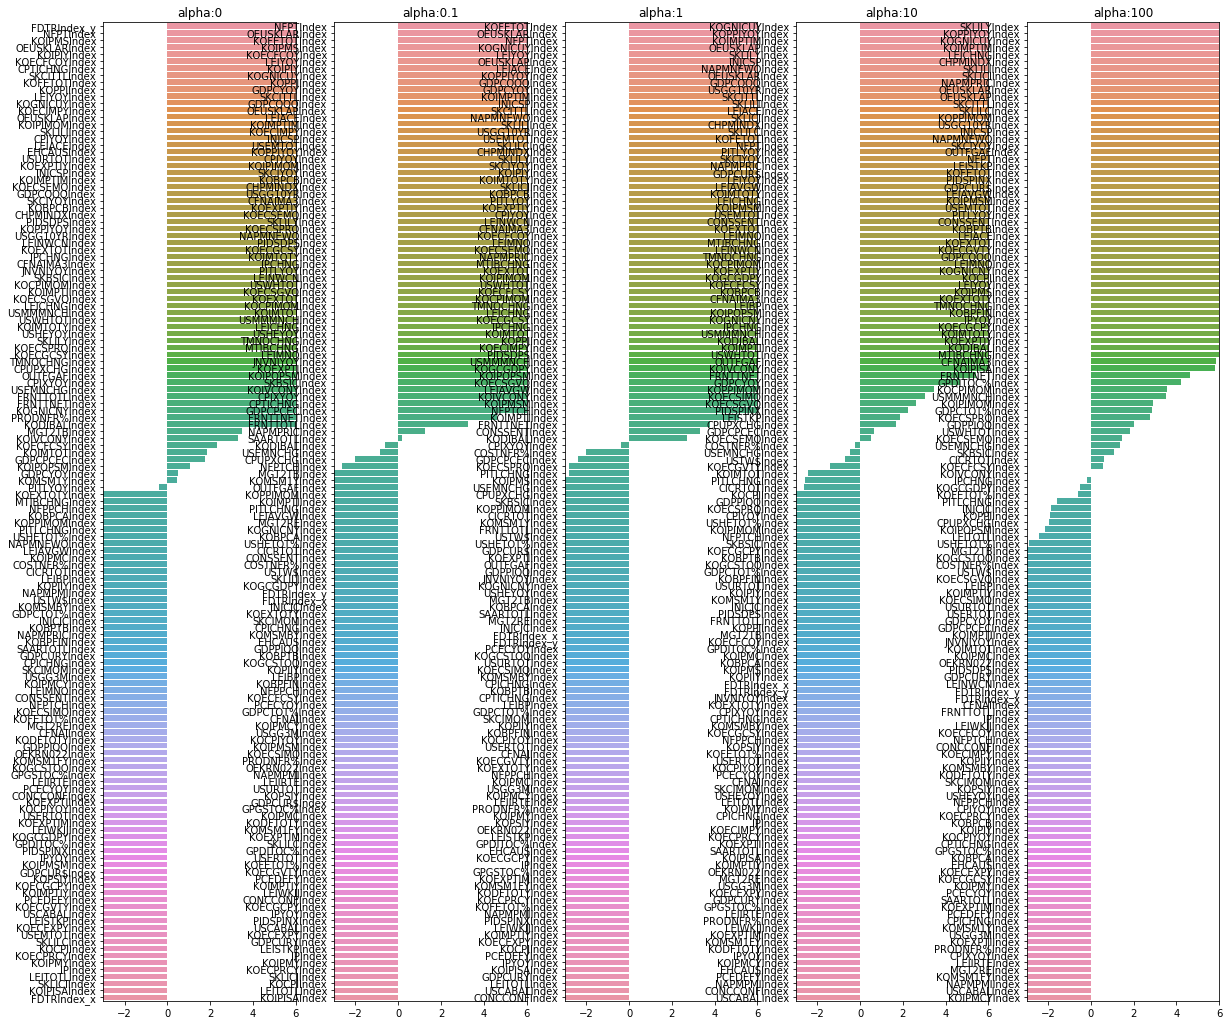

In [117]:
# alpha 값의 변화에 따른 피쳐의 회귀 계수값을 시각화
# 5열 matplotlib 축 생성
fig, axs = plt.subplots(figsize = (20, 18), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀계수 값 시각화 및 데이터 저장
# pos는 axis 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha 에 따른 피쳐별로 회귀 계수를 Series로 변환하고 이를 DataFrame 컬럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. sorting
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

plt.show()
    

In [118]:
# alpha값을 증가시킬 수록 회귀 계쑤값이 작아지는 것 확인
# DataFrame에 저장된 alpha값의 변화에 따른 Ridge 회귀계수값 확인
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
FDTRIndex_y,2.461801e+15,-29.638642,-27.273410,-23.637694,-14.320881
NFPTIndex,4.020206e+03,1164.253987,230.762618,58.846994,27.686418
KOIPMSIndex,2.398209e+03,534.439950,-4.786447,-22.378288,9.147132
OEUSKLARIndex,1.044538e+03,749.175454,247.307285,86.341392,36.996203
KOIPIYIndex,1.021633e+03,339.946305,73.560340,-12.788508,-24.120754
...,...,...,...,...,...
IPIndex,-1.231714e+03,-321.317153,-95.220141,-43.176203,-15.212523
LEITOTLIndex,-1.495788e+03,-693.763690,-226.902007,-40.647421,-2.432849
SKLICIIndex,-2.192962e+03,-518.456263,70.808522,71.498379,38.303418
KOIPISAIndex,-2.436865e+03,-733.569581,-196.643805,-49.450971,5.817219


In [119]:
coeff_df['alpha:100'].sort_values(ascending = False)

SKLILYIndex      74.395316
KOPPIYOYIndex    69.153644
KOGNICUYIndex    61.165876
KOIMPTIMIndex    58.191243
LEICHNGIndex     53.729494
                   ...    
MGT2REIndex     -41.491859
KOMSM1FYIndex   -42.629568
NAPMPMIIndex    -42.867375
USCABALIndex    -46.810294
KOIPMCYIndex    -96.632814
Name: alpha:100, Length: 140, dtype: float64

In [120]:
coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False)

SKLILYIndex      74.395316
KOPPIYOYIndex    69.153644
KOGNICUYIndex    61.165876
KOIMPTIMIndex    58.191243
LEICHNGIndex     53.729494
                   ...    
USEMNCHGIndex     1.357352
SKBSICIndex       1.064059
CICRTOTIndex      0.633708
KOECFCSYIndex     0.561565
KOIVCONYIndex     0.009932
Name: alpha:100, Length: 65, dtype: float64

In [121]:
len(coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False))

65

그러니까 여기까지 정리하면 StandardScaler를 적용했을 때,  
일단 분석에 유의미한 영향을 주는 회귀 계수 0이상의 변수만 봤을 때 그 갯수는 65개임

In [122]:
a = coeff_df[coeff_df['alpha:100'] > 0]['alpha:100']

In [123]:
a = a.index

In [124]:
a = list(a)

In [125]:
a

['USGG10YRIndex',
 'INJCSPIndex',
 'USEMNCHGIndex',
 'USMMMNCHIndex',
 'OUTFGAFIndex',
 'KOIMTOTYIndex',
 'KOEXTOTYIndex',
 'KOCPIMOMIndex',
 'SKCIYOYIndex',
 'KOFETOTIndex',
 'NAPMPRICIndex',
 'KOCPIIndex',
 'NAPMNEWOIndex',
 'SKCITTLIndex',
 'CHPMINDXIndex',
 'USWHTOTIndex',
 'SKBSICIndex',
 'CONSSENTIndex',
 'KOEXTOTIndex',
 'NFPTIndex',
 'USEMTOTIndex',
 'KOIVCONYIndex',
 'KOEXPTIYIndex',
 'LEIYOYIndex',
 'IPYOYIndex',
 'KOIPMSMIndex',
 'KOIPIMOMIndex',
 'TMNOCHNGIndex',
 'KOIMPTIMIndex',
 'PITLYOYIndex',
 'KOPPIYOYIndex',
 'CFNAIMA3Index',
 'LEICHNGIndex',
 'LEIACEIndex',
 'SKLILYIndex',
 'KOPPIMOMIndex',
 'KOIPMSIndex',
 'KOIPISAIndex',
 'SKLILIIndex',
 'SKLILCIndex',
 'SKLICIIndex',
 'LEIAVGWIndex',
 'LEISTKPIndex',
 'PIDSPINXIndex',
 'LEIMNOIndex',
 'KOBPFINIndex',
 'KOBPTBIndex',
 'KODIBALIndex',
 'FRNTTNETIndex',
 'CICRTOTIndex',
 'MTIBCHNGIndex',
 'OEUSKLAPIndex',
 'OEUSKLARIndex',
 'GPDITOC%Index',
 'KOECGCPYIndex',
 'KOECSPRQIndex',
 'KOECFCSYIndex',
 'KOECSEMQIndex',
 'GD

이제 이 과정을 계단식이 아니라 선으로 이었을때도 동일한지를 봐야 한다